### [Learning Rate Schedules and Adaptive Learning Rate Methods for Deep Learning](https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1)

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
from __future__ import print_function
import numpy as np
import math

import matplotlib.pyplot as plt

import keras
from keras import backend as K
from keras.utils import np_utils

from keras.datasets import cifar10

from keras.models import Sequential
from keras.models import model_from_json

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from keras.callbacks import LearningRateScheduler

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


#### Load and prepare CIFAR-10 dataset

In [3]:
BATCH_SIZE = 64
NUM_CLASSES = 2
EPOCHS = 100

Input image dimensions

In [4]:
img_rows, img_cols = 32, 32

Download the dataset

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

For now, we will only consider images of **cats** and **dogs**!

In [6]:
train_picks = np.ravel(np.logical_or(y_train==3, y_train==5))
test_picks = np.ravel(np.logical_or(y_test==3, y_test==5))

In [7]:
y_train = np.array(y_train[train_picks]==5, dtype=int)
y_test = np.array(y_test[test_picks]==5, dtype=int)

In [8]:
X_train = X_train[train_picks]
X_test = X_test[test_picks]

Reshape the data

In [9]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
X_train /= 255
X_test /= 255

In [12]:
print('X_train shape: {}\nTrain samples: {}\nTest samples: {}'.format(X_train.shape, X_train.shape[0], X_test.shape[0]))

X_train shape: (10000, 32, 32, 3)
Train samples: 10000
Test samples: 2000


Convert class vectors to binary class matrices

In [13]:
y_train = keras.utils.to_categorical(np.ravel(y_train), NUM_CLASSES)
y_test = keras.utils.to_categorical(np.ravel(y_test), NUM_CLASSES)

#### Method to build CNN model

In [14]:
def build_cnn(optimizer):
    model = Sequential([
        Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        Conv2D(8, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(16, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax'),
    ])
    
    model.compile(optimizer=optimizer,
                 loss=keras.losses.categorical_crossentropy,
                 metrics=['accuracy'])
    
    return model

#### Method to plot histories

In [15]:
def plot(method, history):
    fig = plt.figure()
    
    plt.plot(range(1, EPOCHS+1), history.history['val_acc'], label='validation')
    plt.plot(range(1, EPOCHS+1), history.history['acc'], label='training')
    plt.legend()
    
    plt.xlim([1, EPOCHS])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    
    plt.title(method)
    plt.grid(True)
    plt.show()

#### Method to plot learning rates

In [16]:
def plot_lr(method, loss_history):
    fig = plt.figure()

    plt.plot(range(1, EPOCHS+1), loss_history.lr, label='learning rate')
    plt.legend()

    plt.xlim([1, EPOCHS+1])
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')

    plt.title('Learning Rate (' + method + ')')
    plt.grid(True)
    plt.show()

#### Constant learning rate

Define SGD optimizer

In [17]:
learning_rate = 0.1
sgd = SGD(lr=learning_rate, momentum=0.0, decay=0.0, nesterov=False)

Build the CNN model

In [18]:
clr_model = build_cnn(sgd)

Fit the model

In [19]:
clr_history = clr_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_data=(X_test, y_test))

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
 - 2s - loss: 0.6880 - acc: 0.5357 - val_loss: 0.6733 - val_acc: 0.5975
Epoch 2/100
 - 2s - loss: 0.6778 - acc: 0.5809 - val_loss: 0.6705 - val_acc: 0.5885
Epoch 3/100
 - 2s - loss: 0.6708 - acc: 0.5914 - val_loss: 0.6536 - val_acc: 0.6335
Epoch 4/100
 - 2s - loss: 0.6622 - acc: 0.6015 - val_loss: 0.6581 - val_acc: 0.6245
Epoch 5/100
 - 2s - loss: 0.6568 - acc: 0.6162 - val_loss: 0.6476 - val_acc: 0.6235
Epoch 6/100
 - 2s - loss: 0.6470 - acc: 0.6256 - val_loss: 0.6459 - val_acc: 0.6235
Epoch 7/100
 - 2s - loss: 0.6390 - acc: 0.6384 - val_loss: 0.6285 - val_acc: 0.6435
Epoch 8/100
 - 2s - loss: 0.6304 - acc: 0.6443 - val_loss: 0.6453 - val_acc: 0.6325
Epoch 9/100
 - 2s - loss: 0.6248 - acc: 0.6507 - val_loss: 0.6105 - val_acc: 0.6630
Epoch 10/100
 - 2s - loss: 0.6179 - acc: 0.6533 - val_loss: 0.6272 - val_acc: 0.6390
Epoch 11/100
 - 2s - loss: 0.6081 - acc: 0.6619 - val_loss: 0.6803 - val_acc: 0.5715
Epoch 12/100
 - 2s - loss

Epoch 97/100
 - 2s - loss: 0.4085 - acc: 0.7789 - val_loss: 0.5859 - val_acc: 0.7075
Epoch 98/100
 - 2s - loss: 0.4080 - acc: 0.7802 - val_loss: 0.5797 - val_acc: 0.7170
Epoch 99/100
 - 2s - loss: 0.4175 - acc: 0.7759 - val_loss: 0.5835 - val_acc: 0.7180
Epoch 100/100
 - 2s - loss: 0.4069 - acc: 0.7846 - val_loss: 0.5697 - val_acc: 0.7095


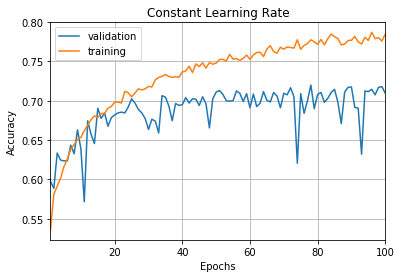

In [20]:
plot('Constant Learning Rate', clr_history)

#### Time-based decay

Define SGD optimizer

In [21]:
learning_rate = 0.1
decay_rate = learning_rate / EPOCHS
momentum = 0.5

In [22]:
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

Build the CNN model

In [23]:
tbd_model = build_cnn(sgd)

Fit the model

In [24]:
tbd_history = tbd_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_data=(X_test, y_test))

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
 - 2s - loss: 0.6928 - acc: 0.5093 - val_loss: 0.6839 - val_acc: 0.5610
Epoch 2/100
 - 2s - loss: 0.6825 - acc: 0.5557 - val_loss: 0.6639 - val_acc: 0.5975
Epoch 3/100
 - 2s - loss: 0.6705 - acc: 0.5860 - val_loss: 0.6587 - val_acc: 0.6280
Epoch 4/100
 - 2s - loss: 0.6648 - acc: 0.5956 - val_loss: 0.6498 - val_acc: 0.6265
Epoch 5/100
 - 2s - loss: 0.6514 - acc: 0.6118 - val_loss: 0.6297 - val_acc: 0.6510
Epoch 6/100
 - 2s - loss: 0.6436 - acc: 0.6307 - val_loss: 0.6232 - val_acc: 0.6655
Epoch 7/100
 - 2s - loss: 0.6367 - acc: 0.6367 - val_loss: 0.6238 - val_acc: 0.6330
Epoch 8/100
 - 2s - loss: 0.6240 - acc: 0.6505 - val_loss: 0.6239 - val_acc: 0.6350
Epoch 9/100
 - 2s - loss: 0.6189 - acc: 0.6525 - val_loss: 0.6284 - val_acc: 0.6425
Epoch 10/100
 - 2s - loss: 0.6138 - acc: 0.6621 - val_loss: 0.6009 - val_acc: 0.6740
Epoch 11/100
 - 2s - loss: 0.6031 - acc: 0.6641 - val_loss: 0.5934 - val_acc: 0.6670
Epoch 12/100
 - 2s - loss

Epoch 97/100
 - 2s - loss: 0.4689 - acc: 0.7548 - val_loss: 0.5594 - val_acc: 0.7120
Epoch 98/100
 - 2s - loss: 0.4712 - acc: 0.7566 - val_loss: 0.5632 - val_acc: 0.7055
Epoch 99/100
 - 2s - loss: 0.4680 - acc: 0.7521 - val_loss: 0.5605 - val_acc: 0.7055
Epoch 100/100
 - 2s - loss: 0.4670 - acc: 0.7520 - val_loss: 0.5617 - val_acc: 0.7055


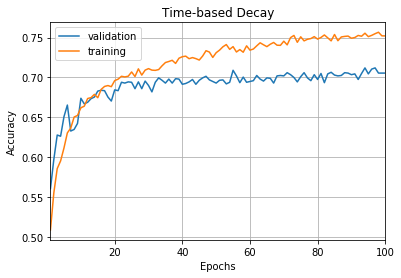

In [25]:
plot('Time-based Decay', tbd_history)

#### Step decay

Define SGD optimizer

In [26]:
momentum = 0.5

In [27]:
sgd = SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False)

Build the CNN model

In [28]:
sd_model = build_cnn(sgd)

Define step decay function

In [29]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
    
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))
        print('lr: {}'.format(step_decay(len(self.losses))))

In [30]:
def step_decay(epoch):
    initial_lr = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * math.pow(drop, math.floor(epoch/epochs_drop))
    return lr

Learn schedule callback

In [31]:
loss_history = LossHistory()
lr = LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lr]

Fit the model

In [32]:
sd_history = sd_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_data=(X_test, y_test), callbacks=callbacks_list)

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
 - 2s - loss: 0.6934 - acc: 0.5091 - val_loss: 0.6909 - val_acc: 0.5050
lr: 0.1
Epoch 2/100
 - 2s - loss: 0.6820 - acc: 0.5634 - val_loss: 0.6864 - val_acc: 0.5345
lr: 0.1
Epoch 3/100
 - 2s - loss: 0.6693 - acc: 0.5930 - val_loss: 0.6668 - val_acc: 0.5950
lr: 0.1
Epoch 4/100
 - 2s - loss: 0.6606 - acc: 0.6040 - val_loss: 0.6475 - val_acc: 0.6190
lr: 0.1
Epoch 5/100
 - 2s - loss: 0.6492 - acc: 0.6178 - val_loss: 0.6520 - val_acc: 0.6230
lr: 0.1
Epoch 6/100
 - 2s - loss: 0.6394 - acc: 0.6290 - val_loss: 0.6242 - val_acc: 0.6465
lr: 0.1
Epoch 7/100
 - 2s - loss: 0.6299 - acc: 0.6413 - val_loss: 0.6199 - val_acc: 0.6435
lr: 0.1
Epoch 8/100
 - 2s - loss: 0.6153 - acc: 0.6629 - val_loss: 0.6385 - val_acc: 0.6365
lr: 0.1
Epoch 9/100
 - 2s - loss: 0.6128 - acc: 0.6601 - val_loss: 0.6186 - val_acc: 0.6470
lr: 0.1
Epoch 10/100
 - 2s - loss: 0.6072 - acc: 0.6641 - val_loss: 0.6228 - val_acc: 0.6680
lr: 0.05
Epoch 11/100
 - 2s - loss: 0.

lr: 0.000390625
Epoch 86/100
 - 2s - loss: 0.4766 - acc: 0.7562 - val_loss: 0.5655 - val_acc: 0.7005
lr: 0.000390625
Epoch 87/100
 - 2s - loss: 0.4779 - acc: 0.7524 - val_loss: 0.5648 - val_acc: 0.7010
lr: 0.000390625
Epoch 88/100
 - 2s - loss: 0.4827 - acc: 0.7481 - val_loss: 0.5652 - val_acc: 0.7030
lr: 0.000390625
Epoch 89/100
 - 2s - loss: 0.4778 - acc: 0.7493 - val_loss: 0.5650 - val_acc: 0.6995
lr: 0.000390625
Epoch 90/100
 - 2s - loss: 0.4753 - acc: 0.7572 - val_loss: 0.5651 - val_acc: 0.7000
lr: 0.0001953125
Epoch 91/100
 - 2s - loss: 0.4783 - acc: 0.7545 - val_loss: 0.5648 - val_acc: 0.6985
lr: 0.0001953125
Epoch 92/100
 - 2s - loss: 0.4816 - acc: 0.7523 - val_loss: 0.5650 - val_acc: 0.7000
lr: 0.0001953125
Epoch 93/100
 - 2s - loss: 0.4783 - acc: 0.7503 - val_loss: 0.5648 - val_acc: 0.6995
lr: 0.0001953125
Epoch 94/100
 - 2s - loss: 0.4807 - acc: 0.7545 - val_loss: 0.5649 - val_acc: 0.7000
lr: 0.0001953125
Epoch 95/100
 - 2s - loss: 0.4763 - acc: 0.7583 - val_loss: 0.5650 - v

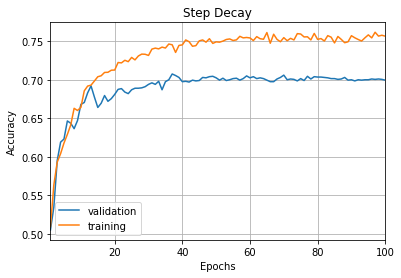

In [33]:
plot('Step Decay', sd_history)

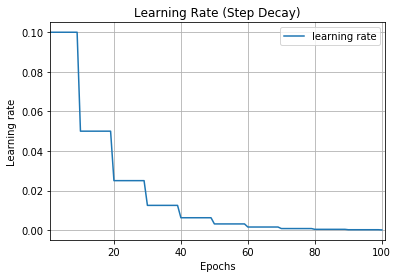

In [34]:
plot_lr('Step Decay', loss_history)

#### Exponential decay

Define SGD optimizer

In [35]:
momentum = 0.8

In [36]:
sgd = SGD(lr=0.0, momentum=momentum, decay=0.0, nesterov=False)

Build the CNN model

In [37]:
ed_model = build_cnn(sgd)

Define exponential decay function

In [38]:
class LossHistory_(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(exp_decay(len(self.losses)))
        print('lr: {}'.format(exp_decay(len(self.losses))))

In [39]:
def exp_decay(epoch):
    initial_lr = 0.1
    k = 0.1
    lr = initial_lr * np.exp(-k*epoch)
    return lr

Learn schedule callback

In [40]:
loss_history_ = LossHistory_()
lr_ = LearningRateScheduler(exp_decay)
callbacks_list_ = [loss_history_, lr_]

Fit the model

In [41]:
ed_history = ed_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_data=(X_test, y_test), callbacks=callbacks_list_)

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
 - 2s - loss: 0.6941 - acc: 0.5063 - val_loss: 0.6934 - val_acc: 0.5000
lr: 0.09048374180359596
Epoch 2/100
 - 2s - loss: 0.6909 - acc: 0.5317 - val_loss: 0.6879 - val_acc: 0.5670
lr: 0.0818730753077982
Epoch 3/100
 - 2s - loss: 0.6857 - acc: 0.5469 - val_loss: 0.6729 - val_acc: 0.5860
lr: 0.0740818220681718
Epoch 4/100
 - 2s - loss: 0.6764 - acc: 0.5732 - val_loss: 0.6656 - val_acc: 0.6070
lr: 0.06703200460356394
Epoch 5/100
 - 2s - loss: 0.6626 - acc: 0.5990 - val_loss: 0.6434 - val_acc: 0.6225
lr: 0.06065306597126335
Epoch 6/100
 - 2s - loss: 0.6556 - acc: 0.6138 - val_loss: 0.6455 - val_acc: 0.6270
lr: 0.05488116360940264
Epoch 7/100
 - 2s - loss: 0.6423 - acc: 0.6256 - val_loss: 0.6345 - val_acc: 0.6365
lr: 0.04965853037914095
Epoch 8/100
 - 2s - loss: 0.6339 - acc: 0.6335 - val_loss: 0.6302 - val_acc: 0.6310
lr: 0.044932896411722156
Epoch 9/100
 - 2s - loss: 0.6299 - acc: 0.6389 - val_loss: 0.6297 - val_acc: 0.6405
lr: 

 - 2s - loss: 0.5230 - acc: 0.7309 - val_loss: 0.5669 - val_acc: 0.6985
lr: 5.530843701478336e-05
Epoch 76/100
 - 2s - loss: 0.5219 - acc: 0.7248 - val_loss: 0.5669 - val_acc: 0.6980
lr: 5.004514334406104e-05
Epoch 77/100
 - 2s - loss: 0.5280 - acc: 0.7244 - val_loss: 0.5668 - val_acc: 0.6980
lr: 4.52827182886797e-05
Epoch 78/100
 - 2s - loss: 0.5228 - acc: 0.7280 - val_loss: 0.5668 - val_acc: 0.6980
lr: 4.097349789797865e-05
Epoch 79/100
 - 2s - loss: 0.5212 - acc: 0.7282 - val_loss: 0.5668 - val_acc: 0.6980
lr: 3.7074354045908826e-05
Epoch 80/100
 - 2s - loss: 0.5202 - acc: 0.7270 - val_loss: 0.5668 - val_acc: 0.6985
lr: 3.354626279025119e-05
Epoch 81/100
 - 2s - loss: 0.5222 - acc: 0.7275 - val_loss: 0.5668 - val_acc: 0.6990
lr: 3.035391380788668e-05
Epoch 82/100
 - 2s - loss: 0.5201 - acc: 0.7262 - val_loss: 0.5668 - val_acc: 0.6980
lr: 2.7465356997214206e-05
Epoch 83/100
 - 2s - loss: 0.5238 - acc: 0.7310 - val_loss: 0.5668 - val_acc: 0.6985
lr: 2.4851682710795188e-05
Epoch 84/100

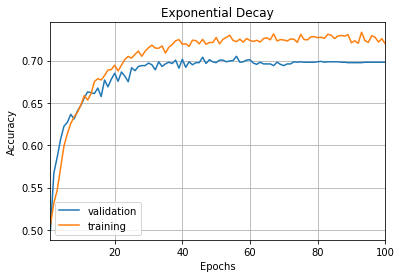

In [42]:
plot('Exponential Decay', ed_history)

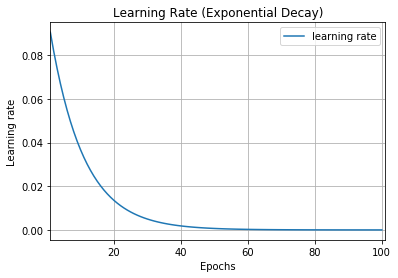

In [43]:
plot_lr('Exponential Decay', loss_history_)

#### Comparison of constant learning rate, time-based decay, step-based decay, and exponential decay

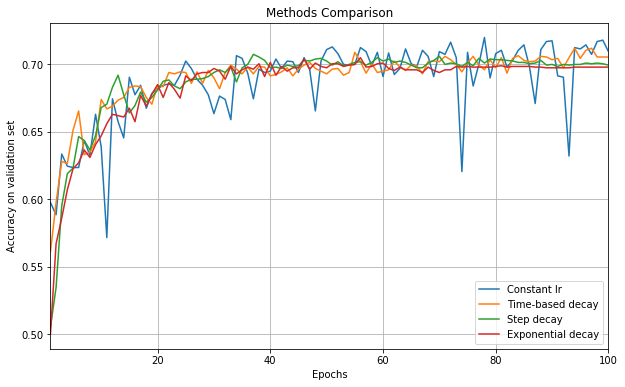

In [44]:
fig = plt.figure(figsize=(10, 6))

plt.plot(range(1, EPOCHS+1), clr_history.history['val_acc'], label='Constant lr')
plt.plot(range(1, EPOCHS+1), tbd_history.history['val_acc'], label='Time-based decay')
plt.plot(range(1, EPOCHS+1), sd_history.history['val_acc'], label='Step decay')
plt.plot(range(1, EPOCHS+1), ed_history.history['val_acc'], label='Exponential decay')
plt.legend()
    
plt.xlim([1, EPOCHS])
plt.xlabel('Epochs')
plt.ylabel('Accuracy on validation set')
    
plt.title('Methods Comparison')
plt.grid(True)
plt.show()

#### Adagrad

In [45]:
adagrad = Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)

Build the CNN model

In [46]:
ag_model = build_cnn(adagrad)

Fit the model

In [47]:
ag_history = ag_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_data=(X_test, y_test))

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
 - 2s - loss: 0.6853 - acc: 0.5424 - val_loss: 0.6638 - val_acc: 0.6205
Epoch 2/100
 - 2s - loss: 0.6591 - acc: 0.6098 - val_loss: 0.6401 - val_acc: 0.6445
Epoch 3/100
 - 2s - loss: 0.6410 - acc: 0.6351 - val_loss: 0.6274 - val_acc: 0.6435
Epoch 4/100
 - 2s - loss: 0.6270 - acc: 0.6452 - val_loss: 0.6196 - val_acc: 0.6555
Epoch 5/100
 - 2s - loss: 0.6225 - acc: 0.6573 - val_loss: 0.6111 - val_acc: 0.6535
Epoch 6/100
 - 2s - loss: 0.6145 - acc: 0.6641 - val_loss: 0.6108 - val_acc: 0.6595
Epoch 7/100
 - 2s - loss: 0.6065 - acc: 0.6703 - val_loss: 0.6082 - val_acc: 0.6590
Epoch 8/100
 - 2s - loss: 0.6033 - acc: 0.6735 - val_loss: 0.5977 - val_acc: 0.6695
Epoch 9/100
 - 2s - loss: 0.5988 - acc: 0.6809 - val_loss: 0.6045 - val_acc: 0.6640
Epoch 10/100
 - 2s - loss: 0.5967 - acc: 0.6794 - val_loss: 0.5906 - val_acc: 0.6805
Epoch 11/100
 - 2s - loss: 0.5937 - acc: 0.6821 - val_loss: 0.5870 - val_acc: 0.6780
Epoch 12/100
 - 2s - loss

Epoch 97/100
 - 2s - loss: 0.5029 - acc: 0.7508 - val_loss: 0.5403 - val_acc: 0.7190
Epoch 98/100
 - 2s - loss: 0.4989 - acc: 0.7542 - val_loss: 0.5394 - val_acc: 0.7220
Epoch 99/100
 - 2s - loss: 0.5043 - acc: 0.7523 - val_loss: 0.5390 - val_acc: 0.7235
Epoch 100/100
 - 2s - loss: 0.5004 - acc: 0.7492 - val_loss: 0.5395 - val_acc: 0.7215


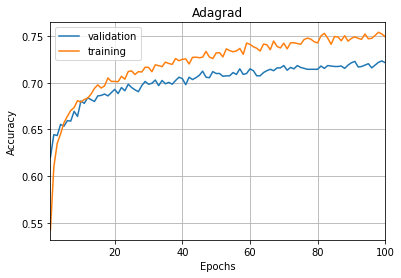

In [48]:
plot('Adagrad', ag_history)

#### Adadelta

In [49]:
adadelta = Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)

Build the CNN model

In [50]:
ad_model = build_cnn(adadelta)

Fit the model

In [51]:
ad_history = ad_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_data=(X_test, y_test))

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
 - 2s - loss: 0.6870 - acc: 0.5459 - val_loss: 0.6733 - val_acc: 0.5820
Epoch 2/100
 - 2s - loss: 0.6707 - acc: 0.5845 - val_loss: 0.6584 - val_acc: 0.6050
Epoch 3/100
 - 2s - loss: 0.6584 - acc: 0.6062 - val_loss: 0.6473 - val_acc: 0.6215
Epoch 4/100
 - 2s - loss: 0.6439 - acc: 0.6349 - val_loss: 0.6314 - val_acc: 0.6500
Epoch 5/100
 - 2s - loss: 0.6302 - acc: 0.6454 - val_loss: 0.6417 - val_acc: 0.6240
Epoch 6/100
 - 2s - loss: 0.6211 - acc: 0.6572 - val_loss: 0.6126 - val_acc: 0.6670
Epoch 7/100
 - 2s - loss: 0.6152 - acc: 0.6627 - val_loss: 0.6139 - val_acc: 0.6560
Epoch 8/100
 - 2s - loss: 0.6075 - acc: 0.6693 - val_loss: 0.6011 - val_acc: 0.6670
Epoch 9/100
 - 2s - loss: 0.6010 - acc: 0.6802 - val_loss: 0.6017 - val_acc: 0.6695
Epoch 10/100
 - 2s - loss: 0.5995 - acc: 0.6827 - val_loss: 0.5947 - val_acc: 0.6675
Epoch 11/100
 - 2s - loss: 0.5926 - acc: 0.6846 - val_loss: 0.6021 - val_acc: 0.6625
Epoch 12/100
 - 2s - loss

Epoch 97/100
 - 2s - loss: 0.4634 - acc: 0.7710 - val_loss: 0.5571 - val_acc: 0.7095
Epoch 98/100
 - 2s - loss: 0.4622 - acc: 0.7753 - val_loss: 0.5493 - val_acc: 0.7235
Epoch 99/100
 - 2s - loss: 0.4705 - acc: 0.7653 - val_loss: 0.5549 - val_acc: 0.7175
Epoch 100/100
 - 2s - loss: 0.4582 - acc: 0.7726 - val_loss: 0.5817 - val_acc: 0.7075


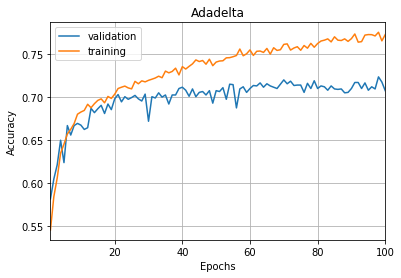

In [52]:
plot('Adadelta', ad_history)

#### RMSprop

In [53]:
rms = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

Buld the CNN model

In [54]:
rms_model = build_cnn(rms)

Fit the model

In [55]:
rms_history = rms_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_data=(X_test, y_test))

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
 - 2s - loss: 0.6883 - acc: 0.5380 - val_loss: 0.6706 - val_acc: 0.6065
Epoch 2/100
 - 2s - loss: 0.6600 - acc: 0.6077 - val_loss: 0.6346 - val_acc: 0.6605
Epoch 3/100
 - 2s - loss: 0.6427 - acc: 0.6331 - val_loss: 0.6262 - val_acc: 0.6450
Epoch 4/100
 - 2s - loss: 0.6233 - acc: 0.6571 - val_loss: 0.6003 - val_acc: 0.6765
Epoch 5/100
 - 2s - loss: 0.6124 - acc: 0.6670 - val_loss: 0.5978 - val_acc: 0.6720
Epoch 6/100
 - 2s - loss: 0.6007 - acc: 0.6792 - val_loss: 0.5799 - val_acc: 0.6895
Epoch 7/100
 - 2s - loss: 0.5913 - acc: 0.6797 - val_loss: 0.5833 - val_acc: 0.6815
Epoch 8/100
 - 2s - loss: 0.5864 - acc: 0.6985 - val_loss: 0.5710 - val_acc: 0.6990
Epoch 9/100
 - 2s - loss: 0.5761 - acc: 0.6990 - val_loss: 0.5797 - val_acc: 0.6875
Epoch 10/100
 - 2s - loss: 0.5710 - acc: 0.7047 - val_loss: 0.5684 - val_acc: 0.7015
Epoch 11/100
 - 2s - loss: 0.5649 - acc: 0.7002 - val_loss: 0.5782 - val_acc: 0.6970
Epoch 12/100
 - 2s - loss

Epoch 97/100
 - 2s - loss: 0.4435 - acc: 0.7859 - val_loss: 0.6009 - val_acc: 0.7240
Epoch 98/100
 - 2s - loss: 0.4361 - acc: 0.7828 - val_loss: 0.5860 - val_acc: 0.6955
Epoch 99/100
 - 2s - loss: 0.4308 - acc: 0.7896 - val_loss: 0.5965 - val_acc: 0.7300
Epoch 100/100
 - 2s - loss: 0.4368 - acc: 0.7860 - val_loss: 0.6170 - val_acc: 0.7365


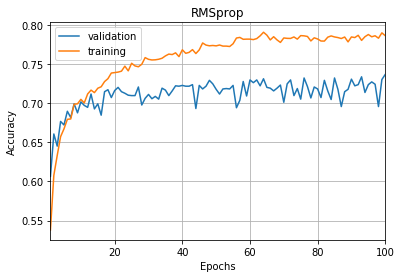

In [56]:
plot('RMSprop', rms_history)

#### Adam

In [57]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

Build the CNN model

In [58]:
adam_model = build_cnn(adam)

Fit the model

In [59]:
adam_history = adam_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_data=(X_test, y_test))

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
 - 2s - loss: 0.7038 - acc: 0.5068 - val_loss: 0.6911 - val_acc: 0.5855
Epoch 2/100
 - 2s - loss: 0.6890 - acc: 0.5257 - val_loss: 0.6892 - val_acc: 0.5550
Epoch 3/100
 - 2s - loss: 0.6840 - acc: 0.5429 - val_loss: 0.6808 - val_acc: 0.5945
Epoch 4/100
 - 2s - loss: 0.6808 - acc: 0.5489 - val_loss: 0.6752 - val_acc: 0.6235
Epoch 5/100
 - 2s - loss: 0.6740 - acc: 0.5631 - val_loss: 0.6612 - val_acc: 0.6300
Epoch 6/100
 - 2s - loss: 0.6677 - acc: 0.5634 - val_loss: 0.6516 - val_acc: 0.6305
Epoch 7/100
 - 2s - loss: 0.6568 - acc: 0.5697 - val_loss: 0.6278 - val_acc: 0.6610
Epoch 8/100
 - 2s - loss: 0.6494 - acc: 0.5898 - val_loss: 0.6288 - val_acc: 0.6730
Epoch 9/100
 - 2s - loss: 0.6373 - acc: 0.6122 - val_loss: 0.6016 - val_acc: 0.6910
Epoch 10/100
 - 2s - loss: 0.6328 - acc: 0.6226 - val_loss: 0.6056 - val_acc: 0.6810
Epoch 11/100
 - 2s - loss: 0.6170 - acc: 0.6469 - val_loss: 0.5920 - val_acc: 0.6705
Epoch 12/100
 - 2s - loss

Epoch 97/100
 - 2s - loss: 0.3990 - acc: 0.7853 - val_loss: 0.5667 - val_acc: 0.7105
Epoch 98/100
 - 2s - loss: 0.3990 - acc: 0.7774 - val_loss: 0.5543 - val_acc: 0.7225
Epoch 99/100
 - 2s - loss: 0.3943 - acc: 0.7868 - val_loss: 0.5576 - val_acc: 0.7220
Epoch 100/100
 - 2s - loss: 0.3903 - acc: 0.7998 - val_loss: 0.5593 - val_acc: 0.7190


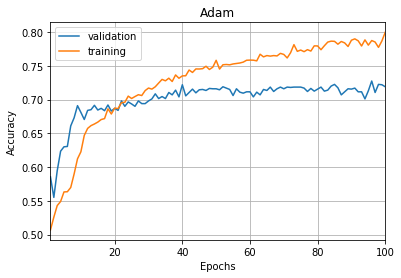

In [60]:
plot('Adam', adam_history)

#### Comparison of Adagrad, Adadelta, RMSprop, and Adam

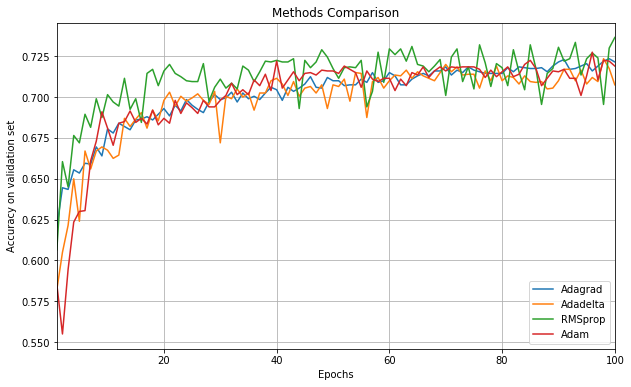

In [61]:
fig = plt.figure(figsize=(10, 6))

plt.plot(range(1, EPOCHS+1), ag_history.history['val_acc'], label='Adagrad')
plt.plot(range(1, EPOCHS+1), ad_history.history['val_acc'], label='Adadelta')
plt.plot(range(1, EPOCHS+1), rms_history.history['val_acc'], label='RMSprop')
plt.plot(range(1, EPOCHS+1), adam_history.history['val_acc'], label='Adam')
plt.legend()
    
plt.xlim([1, EPOCHS])
plt.xlabel('Epochs')
plt.ylabel('Accuracy on validation set')
    
plt.title('Methods Comparison')
plt.grid(True)
plt.show()

#### Summary

Following plot shows the comparison of:
1. Constant Learning Rate,
2. Time-based Decay,
3. Step Decay,
4. Exponential Decay
5. Adagrad,
6. Adadelta,
7. RMSprop,
8. Adam.

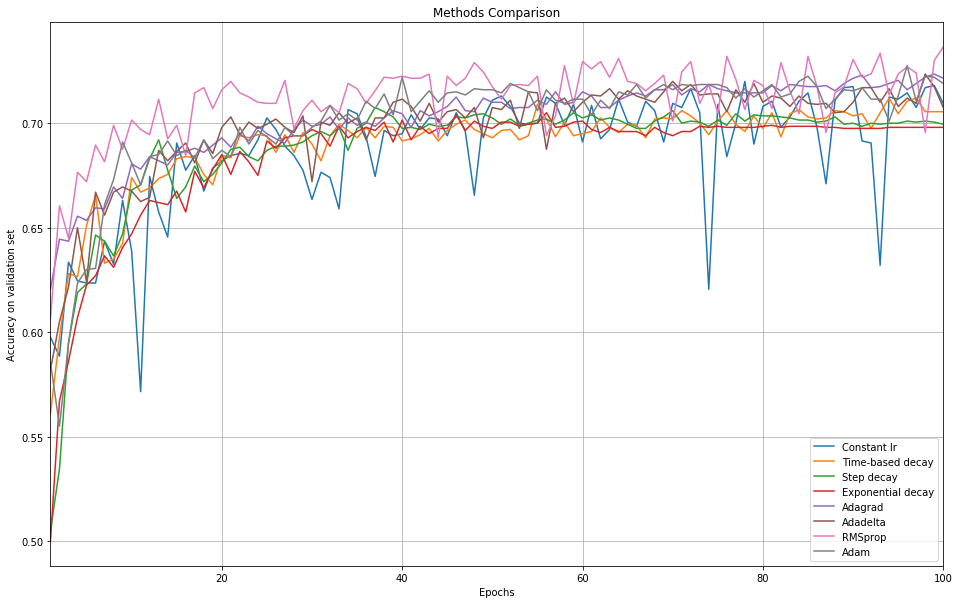

In [62]:
fig = plt.figure(figsize=(16, 10))

plt.plot(range(1, EPOCHS+1), clr_history.history['val_acc'], label='Constant lr')
plt.plot(range(1, EPOCHS+1), tbd_history.history['val_acc'], label='Time-based decay')
plt.plot(range(1, EPOCHS+1), sd_history.history['val_acc'], label='Step decay')
plt.plot(range(1, EPOCHS+1), ed_history.history['val_acc'], label='Exponential decay')
plt.plot(range(1, EPOCHS+1), ag_history.history['val_acc'], label='Adagrad')
plt.plot(range(1, EPOCHS+1), ad_history.history['val_acc'], label='Adadelta')
plt.plot(range(1, EPOCHS+1), rms_history.history['val_acc'], label='RMSprop')
plt.plot(range(1, EPOCHS+1), adam_history.history['val_acc'], label='Adam')
plt.legend()
    
plt.xlim([1, EPOCHS])
plt.xlabel('Epochs')
plt.ylabel('Accuracy on validation set')
    
plt.title('Methods Comparison')
plt.grid(True)
plt.show()